<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210715.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

# 2. 알고리즘

# 3. 딥러닝 & 강화학습

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/abalone.csv')
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


한 가지 문제를 두가지 신경망으로 풀어보자.

In [ ]:
import csv
with open('/content/abalone.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader) #첫번째 줄에 변수명, next로 넘기면 데이터부터 받을수 있다.

  rows = []
  for row in csvreader:
    rows.append(row)

In [ ]:
rows[:5]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'],
 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'],
 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]

In [ ]:
input_cnt = 10
output_cnt = 1
data = np.zeros([len(rows), input_cnt + output_cnt])

print(data.shape)

(4177, 11)


In [ ]:
# 원핫벡터
for n, row in enumerate(rows):
  if row[0] == 'M' : data[n, 0] = 1
  if row[0] == 'F' : data[n, 1] = 1
  if row[0] == 'I' : data[n, 2] = 1
  data[n, 3 : ] = row[1:]

In [ ]:
data[:5]

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

In [ ]:
train_ratio = 0.85 
test_begin_index = int(data.shape[0] * train_ratio)
print(test_begin_index)

#shuffle
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)
shuffle_map[:5]

3550


array([1227, 2184, 3152, 3347, 1368])

In [ ]:
train_data = data[shuffle_map[ : test_begin_index]]
test_data = data[shuffle_map[test_begin_index : ]]

In [ ]:
print(data[:3])
print('-----------------------------')
print(train_data[:3])   #값이 잘 섞인 걸 확인할 수 있다.

[[ 1.      0.      0.      0.455   0.365   0.095   0.514   0.2245  0.101
   0.15   15.    ]
 [ 1.      0.      0.      0.35    0.265   0.09    0.2255  0.0995  0.0485
   0.07    7.    ]
 [ 0.      1.      0.      0.53    0.42    0.135   0.677   0.2565  0.1415
   0.21    9.    ]]
-----------------------------
[[ 0.      0.      1.      0.35    0.255   0.09    0.1785  0.0855  0.0305
   0.0525  8.    ]
 [ 0.      0.      1.      0.32    0.235   0.08    0.1485  0.064   0.031
   0.045   6.    ]
 [ 0.      1.      0.      0.47    0.375   0.105   0.513   0.232   0.142
   0.13   11.    ]]


In [ ]:
#독립과 종속으로 바꿔준다.
train_X, train_Y = train_data[:, :-output_cnt], train_data[:, -output_cnt : ]
test_X, test_Y = test_data[:, :-output_cnt], test_data[:, -output_cnt : ]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(3550, 10)
(3550, 1)
(627, 10)
(627, 1)


In [ ]:
train_X_mean = np.mean(train_X, axis=0)
train_X_std = train_X.std(axis = 0)

print(train_X_mean)
print('===============================')
print(train_X_std)

[0.36084507 0.31915493 0.32       0.52389014 0.40790845 0.13927324
 0.82894268 0.3590538  0.18055577 0.23863282]
[0.48024567 0.46614918 0.46647615 0.12030856 0.09945987 0.03899648
 0.49043808 0.2218251  0.10973542 0.13880132]


In [ ]:
train_X -= train_X_mean
train_X /= train_X_std

test_X -= train_X_mean
test_X /= train_X_std

In [ ]:
GJ_NET_MODEL_V1 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units=10, activation = 'elu',
                                                             input_shape = (10,)),
                                       tf.keras.layers.Dense(units=24, activation='elu',),
                                       tf.keras.layers.Dense(units=36, activation='elu'),
                                       tf.keras.layers.Dense(units=1)
])

In [ ]:
GJ_NET_MODEL_V1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'mse')

In [ ]:
history_1 = GJ_NET_MODEL_V1.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.2)

Epoch 1/25
89/89 [==============================] - 1s 3ms/step - loss: 19.7178 - val_loss: 8.5477
Epoch 2/25
89/89 [==============================] - 0s 2ms/step - loss: 8.6039 - val_loss: 7.9531
Epoch 3/25
89/89 [==============================] - 0s 2ms/step - loss: 8.1363 - val_loss: 7.5620
Epoch 4/25
89/89 [==============================] - 0s 2ms/step - loss: 8.3399 - val_loss: 7.2978
Epoch 5/25
89/89 [==============================] - 0s 2ms/step - loss: 7.6479 - val_loss: 7.0339
Epoch 6/25
89/89 [==============================] - 0s 2ms/step - loss: 7.3460 - val_loss: 6.8169
Epoch 7/25
89/89 [==============================] - 0s 2ms/step - loss: 7.0251 - val_loss: 6.5423
Epoch 8/25
89/89 [==============================] - 0s 2ms/step - loss: 6.7971 - val_loss: 6.7611
Epoch 9/25
89/89 [==============================] - 0s 2ms/step - loss: 6.5509 - val_loss: 6.2017
Epoch 10/25
89/89 [==============================] - 0s 2ms/step - loss: 6.3978 - val_loss: 5.9794
Epoch 11/25
89/89 

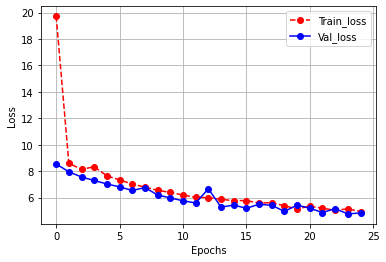

In [ ]:
plt.plot(history_1.history['loss'], '--o', color='red', label = 'Train_loss')
plt.plot(history_1.history['val_loss'], '-o', color='blue', label = 'Val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
pred_Y = GJ_NET_MODEL_V1.predict(test_X)
print(pred_Y[:10])

[[ 8.662142 ]
 [ 4.032856 ]
 [ 3.2747471]
 [ 4.366994 ]
 [ 7.301372 ]
 [-0.3708992]
 [ 8.78134  ]
 [ 9.175491 ]
 [ 2.5747936]
 [ 2.2045414]]


In [ ]:
test_Y[:10]

array([[ 5.],
       [ 9.],
       [16.],
       [15.],
       [11.],
       [10.],
       [ 5.],
       [ 7.],
       [16.],
       [10.]])

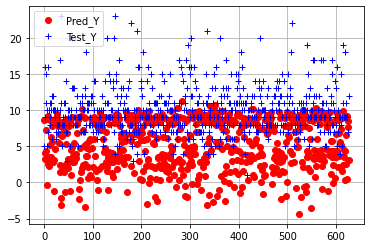

In [ ]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'Pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'Test_Y')

plt.legend()
plt.grid()
plt.show()

In [ ]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print('GJ_NET_MODEL_V1 - ACC : {}%'.format(np.round(acc*100,3)))

GJ_NET_MODEL_V1 - ACC : 43.746%


In [ ]:
# 두번째 모델
GJ_NET_MODEL_V2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units=1, input_shape = (10,))
])

In [ ]:
GJ_NET_MODEL_V2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss='mse')

In [ ]:
history_2 = GJ_NET_MODEL_V2.fit(train_X, train_Y, epochs=200, batch_size=32, 
                    validation_split = 0.2,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])   #callback

Epoch 1/200
89/89 [==============================] - 0s 2ms/step - loss: 59.3882 - val_loss: 25.6335
Epoch 2/200
89/89 [==============================] - 0s 1ms/step - loss: 13.7169 - val_loss: 7.2722
Epoch 3/200
89/89 [==============================] - 0s 1ms/step - loss: 5.7517 - val_loss: 5.1246
Epoch 4/200
89/89 [==============================] - 0s 1ms/step - loss: 4.9799 - val_loss: 5.0813
Epoch 5/200
89/89 [==============================] - 0s 1ms/step - loss: 4.9223 - val_loss: 5.0350
Epoch 6/200
89/89 [==============================] - 0s 1ms/step - loss: 4.8844 - val_loss: 4.9704
Epoch 7/200
89/89 [==============================] - 0s 1ms/step - loss: 4.8834 - val_loss: 4.9123
Epoch 8/200
89/89 [==============================] - 0s 1ms/step - loss: 4.8657 - val_loss: 4.9675
Epoch 9/200
89/89 [==============================] - 0s 1ms/step - loss: 4.8623 - val_loss: 5.0543
Epoch 10/200
89/89 [==============================] - 0s 1ms/step - loss: 4.8867 - val_loss: 4.9688
Epoch 

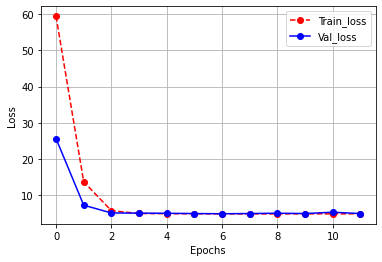

In [ ]:
plt.plot(history_2.history['loss'], '--o', color='red', label = 'Train_loss')
plt.plot(history_2.history['val_loss'], '-o', color='blue', label = 'Val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
pred_Y = GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y)

[[11.760226 ]
 [12.296811 ]
 [10.54259  ]
 [10.613627 ]
 [10.326401 ]
 [13.947557 ]
 [13.061728 ]
 [14.193848 ]
 [ 9.802733 ]
 [10.376738 ]
 [12.130163 ]
 [ 8.824293 ]
 [14.445898 ]
 [ 8.515726 ]
 [11.866047 ]
 [ 8.539649 ]
 [11.072344 ]
 [ 6.5218487]
 [ 7.0113173]
 [11.066566 ]
 [ 7.950446 ]
 [ 8.674992 ]
 [13.933234 ]
 [ 6.946416 ]
 [ 7.8639536]
 [11.371831 ]
 [ 7.5351515]
 [11.583871 ]
 [12.4999695]
 [13.599901 ]
 [ 6.771887 ]
 [13.164536 ]
 [11.098476 ]
 [16.481808 ]
 [ 7.108638 ]
 [ 4.4593906]
 [ 7.087635 ]
 [12.275008 ]
 [ 9.835549 ]
 [ 6.7161546]
 [ 9.179012 ]
 [14.093798 ]
 [13.439475 ]
 [11.76403  ]
 [11.250362 ]
 [ 5.64628  ]
 [10.286616 ]
 [ 9.208004 ]
 [ 9.71099  ]
 [12.017889 ]
 [13.772597 ]
 [ 8.702236 ]
 [10.021819 ]
 [ 9.301405 ]
 [ 9.753757 ]
 [10.518934 ]
 [ 8.134783 ]
 [11.867807 ]
 [14.857495 ]
 [ 9.813923 ]
 [10.099431 ]
 [ 7.5538597]
 [11.256468 ]
 [12.578787 ]
 [10.6323595]
 [ 6.5182457]
 [10.985527 ]
 [10.033972 ]
 [10.002719 ]
 [ 8.878775 ]
 [ 9.956348 ]
 [ 8.4

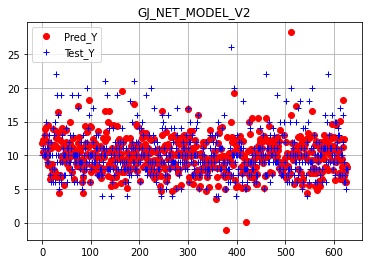

In [ ]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'Pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'Test_Y')

plt.title('GJ_NET_MODEL_V2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print('GJ_NET_MODEL_V2 - ACC : {}%'.format(np.round(acc*100,3)))

GJ_NET_MODEL_V2 - ACC : 83.823%


# 4. 머신러닝

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 26.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=401279af17621c0a15228d6c733ee202a5050dfbc148ddc497c0fdeaeeb723cb
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


#### 평균제곱오차 (MSE, Mean Squared Error) 연습 01
가설의 MSE 값을 계산해보자.


\\( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? \\)

In [ ]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
  cost = np.sum((y_pred - y)**2) / len(y)
  return cost

#### 경사하강법 (Gradient descent algorithm) - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 값을 구하는 방식

- 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 
계속 이동하여 값을 최적화 시키는 방법 <br> (오차 (기울기)가 가장 작은 방향으로 이동시키는 방법)


learning_rate(학습 속도)란?

- W와 b의 미분 값(W_grad, b_grade)을 얼마만큼 반영할지를 결정하는 값.
- 주로 0.001, 0.00001과 같은 매우 작은 값을 사용하며 learning_rate가 클수록 변화가 빠르며, learning_rate가 작을수록 변화가 느리다고 예상.
- 꼭 변화가 빠르다고 해서 결과를 빨리 볼 수 있는 것은 아님.

  0 w=0.784340, b=0.294594, cost=17.495495, xx=-0.795046
  1 w=1.579386, b=1.089640, cost=10.248456, xx=-0.363662
  2 w=1.943048, b=1.453303, cost=7.845584, xx=-0.166343
  3 w=2.109391, b=1.619646, cost=6.937298, xx=-0.076087
  4 w=2.185478, b=1.695733, cost=6.561761, xx=-0.034803
  5 w=2.220281, b=1.730536, cost=6.398340, xx=-0.015919
  6 w=2.236200, b=1.746455, cost=6.325337, xx=-0.007282
  7 w=2.243482, b=1.753736, cost=6.292310, xx=-0.003331
  8 w=2.246813, b=1.757067, cost=6.277280, xx=-0.001523
  9 w=2.248336, b=1.758591, cost=6.270421, xx=-0.000697
 10 w=2.249033, b=1.759287, cost=6.267287, xx=-0.000319
 11 w=2.249352, b=1.759606, cost=6.265854, xx=-0.000146
 12 w=2.249497, b=1.759752, cost=6.265199, xx=-0.000067
 13 w=2.249564, b=1.759819, cost=6.264899, xx=-0.000031
 14 w=2.249595, b=1.759849, cost=6.264762, xx=-0.000014
 15 w=2.249609, b=1.759863, cost=6.264699, xx=-0.000006
 16 w=2.249615, b=1.759869, cost=6.264670, xx=-0.000003
 17 w=2.249618, b=1.759872, cost=6.264657, xx=

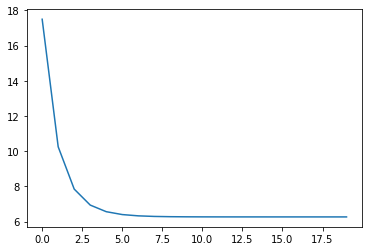

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
w_val = []
cost_val = []
xx_val = []

n_samples = 200
x = np.random.randn(n_samples)
x.shape
y = 2 * x + 4 + np.random.randn(n_samples)
# plt.scatter(x, y)

n_epoch = 20    # 반복횟수
lr = 0.5        # 학습속도

w = np.random.uniform()
b = np.random.uniform()

for epoch in range(n_epoch):
  y_pred = w * x + b
  cost = MSE(y_pred, y)
  xx = lr * ((y_pred - y) * x).mean()
  print(f'{epoch:3} w={w:.6f}, b={b:.6f}, cost={cost:.6f}, xx={xx:.6f}')

  w = w - xx
  b = b - lr * ((y_pred - y) * x).mean()


  w_val.append(w)
  cost_val.append(cost)
  xx_val.append(xx)

plt.plot(range(n_epoch), cost_val)

#### LinearRegression 실습 01

배달시간 예측
- 설정 거리의 장소에 배달하려면 얼마나 걸리는지 예측

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 

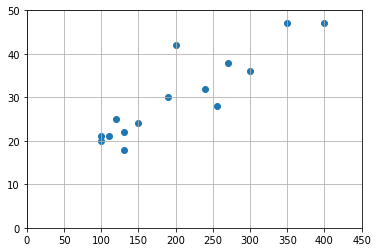

In [ ]:
# 배달거리와 배달시간 데이터
data = np.array([
    [100, 20], 
		[150, 24], 
		[300, 36], 
		[400, 47], 
		[130, 22], 
		[240, 32],
		[350, 47], 
		[200, 42], 
		[100, 21], 
		[110, 21], 
		[190, 30], 
		[120, 25], 
		[130, 18], 
		[270, 38], 
		[255, 28]])

x = data[:, 0]
y = data[:, 1]
plt.scatter(x,y)
plt.xlim(0,450)
plt.ylim(0,50)
plt.grid()

In [ ]:
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    # 분자 부분
    dc = sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))])
    # 분모 부분  
    d = sum([(x[i] - mean_x) ** 2 for i in range(len(x))])
    return dc / d

mx = np.mean(x)
my = np.mean(y)
# 기울기
a = compute_a(x, y, mx, my)
# 절편
b = my - (mx * a)
a, b

(0.09229753862877554, 11.330266325025232)

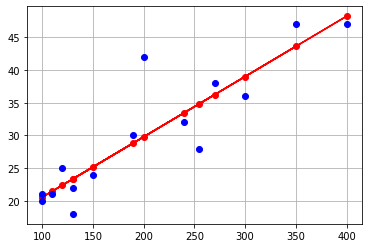

In [ ]:
# 1
y_pred = [a * x1 + b for x1 in x]
plt.plot(x, y_pred, 'r-o')
plt.plot(x, y, 'bo')
plt.grid()

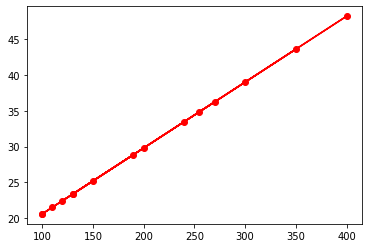

In [ ]:
# 2
x1 = np.array(x)
y_pred = a * x1 + b
plt.plot(x, y_pred, 'r-o')

- 예측하기 (거리가 350인경우 배달시간)

In [ ]:
t = a * 350 + b
t

43.63440484509667

#### 일반 선형회귀

예측값과 실제 값의 cost를 최소화할 수 있도록 W(가중치, 회귀계수)를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

단순 선형회귀 (Simple Linear Regression)
> \\( H({ x })={ W }{ x }+b \\)

다변수 선형회귀 (Multi-variable Linear Regreesion)
> 변수가 3개 일때의 H(x) <br>
> \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+b \\)

> 변수가 n개 일때의 H(x) <br>
>  \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 },\dots ,{ x }_{ n })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+\dots +{ W }_{ n }{ x }_{ n }+b \\)

다항 회귀 (Polynomial Regreesion)
> 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것 <br>
> 차수가 높아질수록 과적합의 문제가 발생


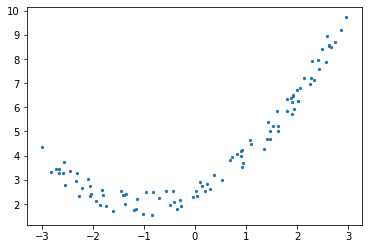

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = 6 * np.random.rand(n, 1) - 3
x.shape   #(100,1)
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)
#다항의 특징 추가. , . 데이터 전처리

plt.scatter(x, y, s=5)

In [ ]:
# 전처리단계

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x.shape, x_poly.shape

((100, 1), (100, 2))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly, y)
model.coef_, model.intercept_

(array([[0.98996833, 0.48795568]]), array([2.54428153]))

#### LinearRegression 실습 02

wave 데이터셋에 선형회귀 적용

LinearRegression()
```
LinearRegression(fit_intercept, normalize, copy_X, n_jobs)
```
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- n_jobs : 계산에 사용할 작업 수

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

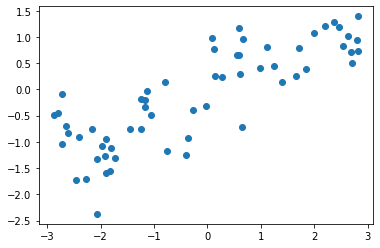

In [ ]:
X, y = mglearn.datasets.make_wave(60)
plt.scatter(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print('가중치(계수, 기울기, w):', model.coef_)
print('편향(절편, b):', model.intercept_)

print('훈련 점수:', model.score(X_train, y_train))
print('테스트 점수:', model.score(X_test, y_test))

가중치(계수, 기울기, w): [0.39390555]
편향(절편, b): -0.031804343026759746
훈련 점수: 0.6700890315075756
테스트 점수: 0.65933685968637


#### LinearRegression 실습 03 - 1
변수가 1개인 경우

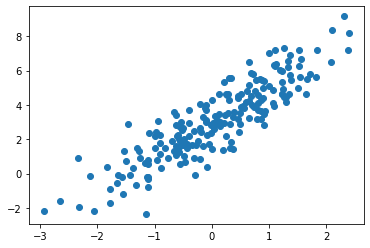

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 200
x = np.random.randn(n_samples)
w = 2
b = 3
y = w * x + b + np.random.randn(n_samples)  # 노이즈
plt.scatter(x, y)

In [ ]:
# 위에 주어진 x, y를 이용하여 LinearRegression을 만들고, 
# 가중치와 편향을 출력해 보세요.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

# x = np.reshape(x,(200,1))
# y = np.reshape(y, (200,1)) 
model.fit(x.reshape(-1,1), y)
model.coef_, model. intercept_
#기울기         #편향

(array([[1.91517707]]), array([2.98876439]))